<img src="../images/cads-logo.png" style="height: 100px;" align=left> 
<img src="../images/python-logo.png" style="height: 100px;" align=right>

# Statistical Data Analysis
Day 1.2

## Content outline 

1. [Random Variables](#random_var)
2. [Graphs of probability distributions](#proba_dist)
    * **Discrete Random Variable**
        * [Probability Mass Function (PMF)](#pmf)
        * [Cumulative Distribution Function (CDF) for discrete random variables](#discretecdf)
    * **Continous Random Variable**
        * [Probability Distribution function (PDF)](#pdf)
        * [Cumulative Distribution function (CDF) for continuous random variables](#continuouscdf)
3. [Some common distributions](#common_distribution)
    * [Normal Distribution](#normal)
    * [Binomial Distribution](#binomial)
    * [Poisson Distribution](#poisson)
    * [Exponential Distribution](#exponential)

In [2]:
import numpy as np 
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.stats import binom, gamma, norm, poisson, expon

<a name='random_var'> </a>

# 1. Random Variables

So far, we have studied the probability of categorical variables such as *blood type*, *gender*, etc. however, we need to consider the probability of numerical variables as well.

A **random variable**, usually written as $X$, is the outcome of a random experience. 

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
    Consider the random experiment of flipping a coin twice. The sample space of possible outcomes is $S = \{ HH, HT, TH, TT \}$.

If the random variable $X$ is **the number of heads** that the random experiment will produce, then the following are the possible outcomes for $X$: 

* If the outcome is HH, we will have two heads, so the value for $X$ is 2.
* If the outcome is HT, we will get one head, so the value for $X$ is 1.
* If the outcome is TH, we also will get one head, so the value for $X$ is 1.
* Lastly, if the outcome is TT, we will get no heads, so the value for $X$ is 0.

Therefore, $X$ is a **quantitative variable** that takes the possible values of 0, 1, or 2. It is *random* because we do not know which of the three values the variable will eventually take. 

We can ask questions like:

* What is the probability that $X$ will be 2? In other words, what is the probability of getting 2 heads?
* What is the probability that $X$ will be at least 1? In other words, what is the probability of getting at least 1 head?
</div>

As you can see, random variables are not really a new concept, but just a different way of looking at the same problem.

Note that if we had tossed a coin three times, the possible values for the number of tails would be $0, 1, 2,$ or $3$. In general, if we toss a coin "n" times, the possible number of tails would be $0, 1, 2, 3, ... , n$.

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
    Let's say we choose a male university student and record his height. What is the sample space? Can you list that?

> The random variable $X$, **the height of the male student**, is continuous and the sample space is an interval.
</div>

A random variable like the one in the first example, whose possible values is a list of distinct values, is called a **discrete random variable**. A random variable like the one in the second example, that can take any value in an interval, is called a **continuous random variable**.

<div class = "alert alert-block alert-warning">
<b>Exercise</b>
<p>
Choose a college student at random. Is the following a discrete or continuous random variable? 

a. The number of courses the student takes this semester <br>

b. The student's weight <br>


c. The number of siblings the student has<br>

</div>

In [ ]:
a. discrete
b. continous
c. discrete

# 2. Graphs of probability distributions <a name='proba_dist'> </a>

## Probability Mass Function (PMF) <a name='pmf'> </a>

The probability that the realisation of a discrete random variable is equal to a given number is given by a Probability Mass Function.

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
Let $X$ be the outcome of rolling a dice. The probability of the outcome is given by the following PMF:

$$ PMF_X(x) = P(X=x) = 
                \begin{cases}
                    1/6, & x=1 \\
                    1/6, & x=2 \\
                    1/6, & x=3 \\
                    1/6, & x=4 \\
                    1/6, & x=5 \\
                    1/6, & x=6 
                \end{cases} $$
Let's draw the PMF for this random variable:
</div>

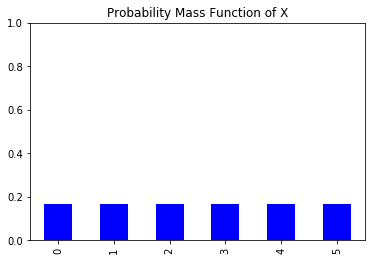

In [6]:
pd.Series(np.repeat(1/6, 6)).plot.bar(title = "Probability Mass Function of X", 
                                      ylim = (0,1), color='blue')

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
    Suppose we want to calculate how the sum of multiple dice rolls is distributed.

Let the variable $X$ represent the sum of the outcome of rolling 2 dice.

Also assume that the random variable $A_1$ represents the outcome of dice 1, and the random variable $A_2$ represents the outcome of dice 2, i.e. $X=A_1+A_2$. Then:

$$ PMF_{X}(x) = P(X=x) = 
                \begin{cases}
                    0, & x=1 \\
                    P(\{A_1=1\, \&\, A_2=1\})=P(A_1=1) * P(A_2=1)=1/6 * 1/6=1/36, & x=2 \\
                    P(\{A_1=1\, \&\, A_2=2\}\, or\, \{A_1=2\, \&\, A_2=1\})= 2/36, & x=3 \\
                    P(\{A_1=1\, \&\, A_2=3\}\, or\, \{A_1=3\, \&\, A_2=1\}\, or\, \{A_1=2\, \&\, A_2=2\})=3/36, & x=4 \\
                    P(\{1\, \&\, 4\}\, or\, \{2\, \&\, 3\}\, or\, \{3\, \&\, 2\}\, or\, \{4\, \&\, 1\})=4/36, & x=5 \\
                    P(\{1\, \&\, 5\}\, or\, \{2\, \&\, 4\}\, or\, \{3\, \&\, 3\}\, or\, \{4\, \&\, 2\}\, or\, \{5\, \&\, 1\})=5/36, & x=6 \\
                    P(\{1\, \&\, 6\}\, or\, \{2\, \&\, 5\}\, or\, \{3\, \&\, 4\}\, or\, \{4\, \&\, 3\}\, or\, \{5\, \&\, 2\}\, or\, \{6\, \&\, 1\})=6/36 & x=7 \\
                    .\\
                    .\\
                    .\\
                    ..., & x=12
                \end{cases} $$
                </div>

<div class = "alert alert-block alert-warning">
<b>Exercise</b>
<p>
Complete the above calculation for $PMF_X(x)$:

> $$ PMF_{X}(x) = P(X=x) = 
                \begin{cases}
                    0, & x=1 \\
                    P(\{A_1=1\, \&\, A_2=1\})=P(A_1=1) * P(A_2=1)=1/6 * 1/6=1/36, & x=2 \\
                    P(\{A_1=1\, \&\, A_2=2\}\, or\, \{A_1=2 \& A_2=1\})= 2/36, & x=3 \\
                    P(\{A_1=1\, \&\, A_2=3\}\, or\, \{A_1=3 \& A_2=1\} \,or\, \{A_1=2 \& A_2=2\})=3/36, & x=4 \\
                    P(\{1\, \&\, 4\}\, or\, \{2\, \& \,3\}\, or\, \{3 \,\&\, 2\}\, or\, \{4\, \&\, 1\})=4/36, & x=5 \\
                    P(\{1\, \&\, 5\}\, or\, \{2\, \& \,4\}\, or\, \{3\, \&\, 3\}\, or\, \{4\, \&\, 2\}\, or\, \{5\, \&\, 1\})=5/36, & x=6 \\
                    P(\{1\, \&\, 6\}\, or\, \{2 \,\& \,5\}\, or \,\{3\, \& \,4\}\, or\, \{4\, \&\, 3\}\, or\, \{5\, \&\, 2\}\, or\, \{6\, \&\, 1\})=6/36 & x=7 \\
                   P(\{2\, \& \,6\}\, or\, \{3 \,\& \,5\}\, or\, \{4\, \& \,4\}\, or \,\{5\, \&\, 3\} \,or \,\{6\, \&\, 2\})=5/36 & x=8 \\
                    P(\{3\, \&\, 6\}\, or\, \{4 \,\& \,5\}\, or\, \{5\, \&\, 4\}\, or \,\{6 \,\& \,3\} )=4/36 & x=9 \\
                   P(\{4\, \&\, 6\}\, or\, \{5 \,\& \,5\}\, or\, \{6 \,\& \,4\})=3/36 & x=10 \\
                    P(\{5\, \&\, 6\}\, or\, \{6\, \&\, 5\})=2/36 & x=11 \\
                    P(\{6\, \& \,6\})=1/36 & x=12\\
                \end{cases} $$
                </div>

We can perform a computer simulation to obtain the PMF: 

In [30]:
import numpy as np 
a1_a2 = pd.Series([sum(np.random.choice(np.arange(1,7), 2)) for i in range(5000)])
a1_a2_dist = a1_a2.value_counts(sort = False, normalize = True).sort_index()
a1_a2_dist

2     0.0274
3     0.0514
4     0.0824
5     0.1068
6     0.1422
7     0.1692
8     0.1364
9     0.1136
10    0.0876
11    0.0526
12    0.0304
dtype: float64

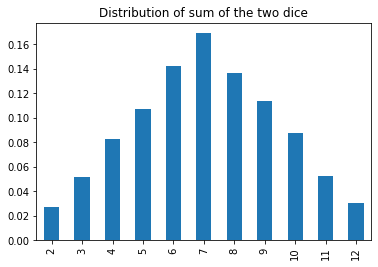

In [31]:
a1_a2_dist.plot.bar(title = "Distribution of sum of the two dice")

In [23]:
# simulate 2 roll dice, and sum them
# repeat 5000 times
# Bar chart for the values
# close to the theoretical, but not the same

We see that the most popular outcome is 7. Why is it so?

**As a probability, the sum of all values of a PMF must equal to 1.**

The number of occurences for each value of the sum is given by the count of possible outcomes in the diagonal ("/") direction, where the row number and column number add to that specified number. For example, the mode, 7, ic romprised of the following events: 1+6, 2+5, 3+4, 4+3, 5+2, 6+1, and occurs a total of 6 out of 36 times.

![](../images/Discrete_sum.png)

The PMF of the sum of two dice rolls can therefore be summarised as follows: 
$$ PMF_X(x)=PMF_{A_1+A_2}(x)=P(A_1 + A_2 = x) =
\begin{cases}
    1/36, & x=2 \\
    2/36, & x=3 \\
    3/36, & x=4 \\
    4/36, & x=5 \\
    5/36, & x=6 \\
    6/36, & x=7 \\
    5/36, & x=8 \\
    4/36, & x=9 \\
    3/36, & x=10 \\
    2/36, & x=11 \\
    1/36. & x=12 
\end{cases} $$

For any discrete random variable $X$, the value of the PMF of $X$ at $x$, $PMF_X(x)$ is the probability that $X$ takes on the value of $x$, $P(X=x)$.

## Cumulative Distribution Function (CDF) for discrete random variables<a name='discretecdf'> </a>

For discrete random variables, the height of the cumulative distribution function at $x$ is the sum of probability mass on the left of $x$, or,  $$CDF_X(x) = P(X \leq x)$$ 

For the previous example of $X = A_1 + A_2$, calculate $CDF_X(x)$. 

$$ CDF_X(x) = P(X \leq  x) = P(A_1 + A_2 \leq  x)=
\begin{cases}
    P(A_1 + A_2 \leq  2) = P(A_1 + A_2 =  2)=1/36, & x=2 \\
    P(A_1 + A_2 \leq  3) = P(A_1 + A_2 =  2 or A_1 + A_2 =  3)= 1/36 + 2/36 = 3/36, & x=3 \\
    P(A_1 + A_2 \leq  4) = P(A_1 + A_2 =  2 or A_1 + A_2 =  3 or A_1 + A_2 =  4)=1/36+2/36+3/36=6/36, & x=4 \\
    ..., & x=5 \\
    ..., & x=6 \\
    ..., & x=7 \\
    ..., & x=8 \\
    ..., & x=9 \\
    ..., & x=10 \\
    ..., & x=11 \\
    ...,  & x=12 
\end{cases} $$

<div class = "alert alert-block alert-warning">
<b>Exercise</b>
<p>
Complete the calculation of $CDF_X(x)$ for the above example:

> $$ CDF_X(x) = P(X \leq  x) = P(A_1 + A_2 \leq  x) 
\begin{cases}
    P(A_1 + A_2 \leq  2) = P(A_1 + A_2 =  2)=1/36, & x=2 \\
    P(A_1 + A_2 \leq  3) = P(A_1 + A_2 \leq   2 or A_1 + A_2 =  3)= 1/36 + 2/36 = 3/36, & x=3 \\
    P(A_1 + A_2 \leq  4) = P(A_1 + A_2 \leq   3 or A_1 + A_2 =  4) = 3/36+3/36=6/36,  & x=4 \\
    P(A_1 + A_2 \leq  5) = P(A_1 + A_2 \leq   4 or A_1 + A_2 =  5) = 6/36+4/36=10/36, & x=5 \\
    P(A_1 + A_2 \leq  6) = P(A_1 + A_2 \leq   5 or A_1 + A_2 =  6) = 10/36+5/36=15/36, & x=6 \\
    P(A_1 + A_2 \leq  7) = P(A_1 + A_2 \leq   6 or A_1 + A_2 =  7) = 15/36+6/36=21/36, & x=7 \\
    P(A_1 + A_2 \leq  8) = P(A_1 + A_2 \leq   7 or A_1 + A_2 =  8) = 21/36+5/36=26/36, & x=8 \\
    P(A_1 + A_2 \leq  9) = P(A_1 + A_2 \leq   8 or A_1 + A_2 =  9) = 26/36+4/36=30/36, & x=9 \\
    P(A_1 + A_2 \leq  10) = P(A_1 + A_2 \leq  9 or A_1 + A_2 =  10) = 30/36+3/36=33/36, & x=10 \\
    P(A_1 + A_2 \leq  11) = P(A_1 + A_2 \leq  10 or A_1 + A_2 =  11) = 33/36+2/36=35/36, & x=11 \\
    P(A_1 + A_2 \leq  12) = P(A_1 + A_2 \leq  11 or A_1 + A_2 =  12) = 35/36+1/36=36/36 = 1,  & x=12 
\end{cases} $$
</div>

The CDF is shown below in red:

In [35]:
pmf_dice = a1_a2.value_counts(sort = False, normalize = True).sort_index()
dice_dist = pd.DataFrame({'pmf': pmf_dice, 
                          'cdf': np.cumsum(pmf_dice)})
dice_dist

,pmf,cdf
2,0.0274,0.0274
3,0.0514,0.0788
4,0.0824,0.1612
5,0.1068,0.2680
6,0.1422,0.4102
7,0.1692,0.5794
8,0.1364,0.7158
9,0.1136,0.8294
10,0.0876,0.9170
11,0.0526,0.9696


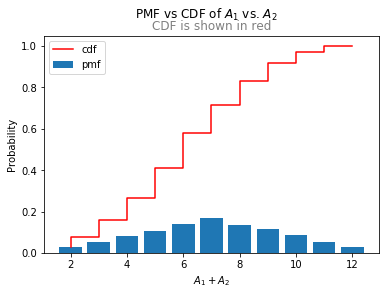

In [33]:
ax = plt.subplot()
ax.bar(x = dice_dist.index, height = dice_dist.pmf, label = "pmf")
ax.step(x = dice_dist.index, y = dice_dist.cdf, c = 'red', label = "cdf")

plt.suptitle('PMF vs CDF of $A_1$ vs. $A_2$')
plt.title('CDF is shown in red', color='grey')
plt.xlabel('$A_1 + A_2$')
plt.ylabel("Probability")
plt.legend()

In [34]:
dice_dist.index

Int64Index([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

<div class = "alert alert-block alert-warning">
<b>Exercise</b>
<p>
    A random variable $X$ has a probability distribution of

$$P(X =  x) =  \frac{x+2}{42}, \hspace{1cm}  x=1,2,3,4,5,6,7$$



&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a. Complete the table representation of $PMF_X(x)$

> \begin{array} {|c|c|}
\hline x &1 &2 &3 &4 &5 &6 &7 \\ 
\hline 
PMF_X(x) &   & &  & & & &   \\
\hline
\end{array}



&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b. Complete the table representation of $CDF_X(x)$

> \begin{array} {|c|c|}
\hline x &1 &2 &3 &4 &5 &6 &7 \\ 
\hline 
CDF_X(x) & & & & & & &  \\
\hline
\end{array}

</div>

In [63]:
x = range(1,8)


pmf=[]
for i in x:
    y = (i+2)/42
    pmf.append(round(y,4))

# or
# pmf = [round((i+2)/42,2) for i in x]
    
cdf = np.cumsum(pmf)
print(pmf)
print(cmf)

[0.0714, 0.0952, 0.119, 0.1429, 0.1667, 0.1905, 0.2143]
[0.071 0.166 0.285 0.428 0.595 0.785 0.999]


In [61]:
# dont need actually
dist = pd.DataFrame({'x': x,
                          'pmf': pmf, 
                          'cdf': np.cumsum(pmf)})
dist

,x,pmf,cdf
0,1,0.0714,0.0714
1,2,0.0952,0.1666
2,3,0.1190,0.2856
3,4,0.1429,0.4285
4,5,0.1667,0.5952
5,6,0.1905,0.7857
6,7,0.2143,1.0000


<div class = "alert alert-block alert-warning">
<b>Exercise</b>
<p>
    Plot $PMF_X(x)$ and $CDF_X(x)$ on the same pair of axes.
    </div>

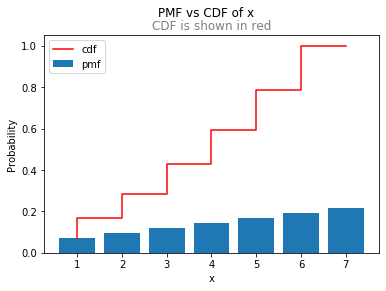

In [65]:
# basically subplot - plotting on same graph?

ax = plt.subplot()
ax.bar(x = dist.x, height = dist.pmf, label = "pmf")
ax.step(x = dist.x, y = dist.cdf, c = 'red', label = "cdf")

plt.suptitle('PMF vs CDF of x')
plt.title('CDF is shown in red', color='grey')
plt.xlabel('x')
plt.ylabel("Probability")
plt.legend()

## Probability Distribution Function (PDF)<a name='pdf'> </a>

If $X$ is a continuous random variable, we cannot represent it as a probability table or barplot. For example, if $X$ is the height of the university male students, all the possible outcomes of $X$ within an interval cannot be listed. We can show the **probability distribution** of a continuous random variable using a smooth curve called **Probability Density Curve**. 

<img src='../images/betweenProb.png'>

The curve represents probabilities by area. The total area under the density curve equals 1.

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
    If $X$ is the height of male university students, the area of the red section in the following figure shows $P(150 \leq X \leq 160)$.

<img src='../images/CountPDF.png'>

If $f(x)$ represents the Probability Distribution Function for a continuous random variable $X$, then <br>

$P(a \leq X \leq b)$= area between a and b under the density curve=$\int_{a}^{b} f(x)\, dx$
</div>

## Cumulative Distribution Function (CDF) for continuous random variables<a name='continuouscdf'> </a>

Some properties of the CDF are:
- The CDF is non-decreasing with x
- It starts with 0 and ends with 1

For continuous random variables, the CDF is also defined as $CDF_X(x) = P(X \leq x)$.

In the discrete case, the sum of the PMF from the left is the height of the CDF; in the continuous case, the integral of the PDF from the left (the area under the curve on the left) is the height of the CDF. $$CDF(x) = \int_{- \infty }^{x} PDF(t) dt$$

Also, differentiation on the CDF yields the PDF. $$PDF(x) = \frac{d} {dx} CDF(x)$$.

**Attention**: We have seen that for a discrete random variable (e.g. the outcome of rolling a dice), whether we have a strict inequality or not does matter when solving for probabilities. But, for a continuous random variable like height, the probability of a height of less than or equal to 170 will be the same as the probability of a height of strictly less than 170. In other words,

$$P(X \leq x)=P(X < x)$$

<img src ='../images/ineqProb.png'>

Visually, in terms of our density curve, the area under the curve up to and including a certain point is the same as the area up to and excluding the point, because there is no area over a single point. 

Conceptually, because a continuous random variable has infinitely many possible values, technically the probability of any single value occurring is zero!

$$P(X = x)=0$$

<img src='../images/equaProb.png'>

It should be clear now why the total area under any probability density curve must be 1. The total area under the curve represents P(X gets a value in the interval of its possible values). Clearly, according to the rules of probability this must be 1, or always true.

$$\int_{-\infty}^{\infty} f(x)\, dx =1$$

<img src='../images/totalProb.png'>

Recall the complement rule. Since $P(X \geq x)$ is the complementary event of $P(X < x)$, <br><br>
$$P(X \geq x)=1-P(X < x)$$

<img src='../images/compProb.png'>

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
Below is an example of a probability distribution function, with its CDF, of a skewed distribution:
    </div>

In [ ]:
x = np.linspace(0,10,501)
pdf_y, cdf_y, ppf_y = gamma.pdf(x, 3), gamma.cdf(x, 3), gamma.ppf(0.5, 3)

Note how the `scipy.stats` continuous random variable functions allow us to construct distribution classes. Specifically, the distribution classs we're interested in are: 
 - `pdf`, for the probability distribution function,  
 - `cdf`, for the cumulative distribution function, and
 - `ppf` for the quantile function. 
 
It can be used as follows: `scipy.stats.rv_continuous.pdf()` with the distribution parameters as arguments. 

The gamma distribution classes take two parameters, `x` and the shape parameter `a`. The gamma distribution is out of the scope of this course, but is used here to illustrate a skewed distribution. 

In [ ]:
x = np.linspace(0,10,501)
ax = plt.subplot()
ax.plot(x, pdf_y, label = "PDF(x)")
ax.plot(x, cdf_y, label = "CDF(x)", color = 'red')
plt.title("PDF & CDF of a GAMMA distribution $\mu = 0.5, \lambda = 3$")
ax.legend()
plt.legend()

In [ ]:
mean_y = gamma.mean(3, loc=0, scale=1)
mean_y

In [ ]:
gamma.median(3, loc=0, scale=1)

In [ ]:
# where is the median? 
median_y = gamma.ppf(0.5, 3)
#gamma.median(3, loc=0, scale=1)

In [ ]:
median_y

In [ ]:
fg, ax = plt.subplots(nrows = 2, ncols = 1)
plt.suptitle('Probability distribution and density function of gamma distribution\n with shape parameter 3 and scale parameter 1 on interval (0,10)')

ax[0].plot(x, cdf_y, color = 'black', label = 'cdf')
ax[1].plot(x, pdf_y, label = 'pdf')

for i, axis in enumerate(ax.flatten()):
    axis.vlines(mean_y, ymin = 0, ymax = 1, color = 'orange', label = 'mean')
    axis.vlines(median_y, ymin = 0, ymax = 1, color = 'red', label='median')
    
plt.legend()


The **median** of the PDF is the value of $x$ where the area to the left equals the area to the right, i.e. the area coloured dark grey is equal to 0.5. <br>The **mean** of the PDF is the value of $x$ at which the probability density achieves its maximum.

# 3. Some common distributions <a name='common_distribution'> </a>

## Normal Distribution<a name='normal'> </a>

The normal distribution (also called Gaussian distribution) is perhaps the most important distribution in all of statistics, as we will see when we discuss the **Central Limit Theorem**. It is a continuous probability distribution with the following properties:
- It is defined by two parameters: the mean, $\mu$ and the standard deviation, $\sigma$.
- It is symmetric about the mean: $P(\mu + x) = P(\mu - x)$ for any $x$.
- Its range is from negative infinity to positive infinity, although after a few standard deviations from the mean, the probability is negligible.
- Its quantiles can be defined with the mean and standard deviations. For example, the 1st quartile is always $\mu - 0.67\sigma$.
- The PDF of the normal distribution with mean $\mu$ and standard deviation $\sigma$ is $$PDF_X(x)= \frac{1}{\sqrt{2\pi\sigma}} \exp{\left(\frac {- {(x - \mu)}^2}{2\sigma^2}\right)}$$
- The **standard normal distribution** is the normal distribution with zero mean and unit standard deviation.

### Examples:
    * heights of people
    * errors in measurements
    * blood pressure
    * marks on a test

### The Standard Deviation Rule
Around 68% of the data are centered around the mean.

$$P (\mu-\sigma \leq x \leq \mu+\sigma )= 0.68$$

<table border=1>
<tr><td>Standard Normal Distribution</td><td><img src="../images/Bell-Curve.png" height="400" width="600"></td></tr></table>
<br><br>



For the distribution classes of the normal distribution, the `loc` argument specifies the mean, whereas the `scale` argument specifies the standard deviation. The syntax is: 
```python
norm.pdf(x, loc, scale)
```

In [ ]:
x = np.arange(-5, 5, .01)
y1_pdf, y2_pdf = norm.pdf(x, 0, 2), norm.pdf(x, -1, 1)

In [ ]:
ax = plt.subplot()
ax.plot(x, y1_pdf, label = "$\mu = 0, \sigma = 2$")
ax.plot(x, y2_pdf, label = "$\mu = -1, \sigma = 1$")
plt.title("PDF of normal distributions")
ax.legend()

In [ ]:
norm.ppf(0.25, 5, 1)

In [ ]:
x = np.arange(-5, 5, .01)
y1_pdf, y2_pdf = norm.pdf(x, 0, 2), norm.cdf(x, 0, 2)
ax = plt.subplot()
ax.plot(x, y1_pdf, label = "PDF(x)")
ax.plot(x, y2_pdf, label = "CDF(x)", color = 'red')
plt.title("PDF & CDF of a normal distribution $\mu = 0, \sigma = 2$")
ax.legend()

## Binomial Distribution<a name='binomial'> </a>

The binomial distribution with parameters $n$ and $p$ is a discrete probability distribution of the number of successes in a sequence of $n$ independent binary (e.g. yes/no) experiments, each of which has probability $p$ of success.

**Binomial Distribution characteristics:**

- The process consists of a sequence of $n$ trials.
- Only two possible outcomes, 'success' or 'failure'.
    - The probability of success, $p$, is equal to $1 - q$, where $q$ is the probability of failure.
- Trials are independent of one another: the outcome of previous trials do not influence future trials.
- The values of $n$ and $p$ determine the shape of the binomial distribution.
- Examples: 
    - Tossing a fair coin (heads = success, tails = failure, n = number of coin tosses made)
    - Performance of a telephone sales team (sales closed = success, rejected customer = failure, n = number of phone calls made)

**Probability Mass Function (PMF)**
The probability of getting exactly $k$ successes in $n$ trials is given by
    $$f(k;n,p) = Pr(X=k) =\binom{n}{k}p^k(1-p)^{n-k}$$


**Motivating question:** Suppose we toss a fair coin 3 times, what is the probability we get 0, 1, 2, or 3 heads?

The Binomial distribution is given by the formula

$$\binom{n}{k}p^k(1-p)^{n-k}$$

where $k$ is the number of successes, $n$ is the number of trials, and $p$ is the probability of success. 
In this formula, $\binom{n}{k}$ is also known as the **binomial coefficient**. It can be read as "$n$ choose $k$". It represents the number of distinct sequences of length $n$ where there are $k$ successes.

**The formula for the binomial coefficient is:** 

$$\binom{n}{k} = C(n,k) = n\mathrm{C}k = \frac{n!}{k! (n-k)!} $$
(This is just for your reference. You may recognise this as the Combinations formula)

**Population mean and standard deviation**

* The population mean of binomial random variable is $np$. 
* The population standard deviation is $\sqrt{np(1-p)}$.

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
Suppose you toss a fair coin 4 times, and you would like to know the probability of having 2 heads and 2 tails. Let us enumerate the event space 

$$\{HHHH, HHHT, HHTH, HHTT, HTHH, HTHT, HTTH, HTTT, THHH, THHT, THTH, THTT, TTHH, TTHT, TTTH, TTTT\}$$

The number of events having 2 heads and 2 tails is $\binom{4}{2}=6$. You can verify this by manually counting 

$$\{HHTT, HTHT, HTTH, THHT, THTH, TTHH\}$$

The $2^4=16$ events in the event space are equally likely. Therefore the probability is 6 * (1/16) = 0.375. Equivalently $$\binom{4}{2} 0.5^2 (1-0.5)^2 = 0.375$$
</div>

### Programmatic solution
You can use `scipy.special.comb` to find $\binom{4}{2}$:

In [ ]:
from scipy.special import comb
print(comb(4,2))
print(comb(4,2)*(.5**2)*((1-.5)**2))

Before we discuss the `scipy`-based solution, note that `scipy.stats` defines a probability mass function (`rv_discrete.pmf`) instead of a probability distribution function. 

In [ ]:
print(binom.pmf(3,10,.167))

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
Suppose that you work in a customer service department of a large retailer. Your colleague bets RM10 that there will be 2 or fewer complaints over the quality of service out of 100 sales made today. How likely is she to win that RM10?

The probability that each individual customer will complain is 0.1. For the purposes of this experiment, you can assume that the probability each customer will complain remains constant and that each sale is identical to one another.


The probability that $k$ is less than or equal to 2, $\Pr{(k \leq 2)}$ is equal to the sum of $\Pr{(k=2)}$, $\Pr{(k=1)}$, and $\Pr{(k=0)}$, i.e.

$$P(k \leq 2)= P(k = 2) + P(k = 1) + P(k = 0)$$

Given 
- $p = 0.1$
- $n = 100$
- $k = 2, 1, 0$

$$\binom{100}{2}0.1^20.9^{100-2} + \binom{100}{1}0.1^10.9^{100-1} + \binom{100}{0}0.1^00.9^{100-0} = 0.00194488465$$

which means that there is a 0.19% chance for two or fewer complaints per 100 customers.
</div>

In [ ]:
print(binom.cdf(5, 100, 0.1)-binom.cdf(2, 100, 0.1))

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
 Suppose a biased coin comes up heads with probability 0.3 when tossed. What is the probability of achieving <b>4</b> heads <b>after 6</b> tosses?
    \begin{equation*}
     \Pr(4{\text{ heads}})=f(4)=\Pr(X=4)={6 \choose 4}0.3^{4}(1-0.3)^{6-4}\approx 0.0595
    \end{equation*}
    </div>

In [ ]:
print(binom.pmf(4, 6, .3))

# Extra 

### Normal distribution as limiting case of the binomial distribution

We plot below the normal and binomial distributions with the same mean and standard deviations.

Recall that for a binomial distribution $\mu = np$ and $\sigma = \sqrt{np(1-p)}$. 

In [ ]:
x1 = np.linspace(0,10,501)
norm_pdf = norm.pdf(x1, 5, 2.5 ** .5)

x2 = np.arange(0,10)
binom_pmf = binom.pmf(x2, 10, .5)

In [ ]:
plt.bar(x = x2, height = binom_pmf, label = "$X_2 \sim B(n=10, p =.5)$", color = 'aliceblue')
plt.plot(x1, norm_pdf, label = "$X_1 \sim N(\mu = 5, \sigma = \sqrt{2.5})$")
plt.legend()
plt.title("PMF of normal distribution and PDF of binomial distribution")

In [ ]:
norm_cdf = norm.cdf(x1, 5, 2.5 ** .5)
binom_cdf = binom.cdf(x2, 10, .5)

plt.plot(x1, norm_cdf, label = "$X_1 \sim N(\mu = 5, \sigma = \sqrt{2.5})$")
plt.step(x2, binom_cdf, label = "$X_2 \sim B(n=10, p =.5)$")
plt.legend()
plt.title("CDF of normal and binomial distribution")

The normal distribution can be seen as the limit of the binomial distribution when the size parameter $n$ approaches infinity. For binomial distribution with large $n$, it is often convenient to approximate with the normal distribution having the same mean and variance.

#### Normal approximation of binomial random variables
To approximate a binomial distribution with a normal distribution, set the mean of the normal distribution as $\mu=np$, and sd $\sigma=\sqrt{np(1-p)}$. As a rule of thumb, use the normal approximation for counts and proportions only if $np>10$ and $n(1-p)>10$.

#### Poisson distribution as a limiting case of binomial distribution
Below we introduce the Poisson distribution. It is also another limit of binomial distribution. In this case, the mean is fixed, and as $n$ increases to infinity, $p$ decreases so as to keep the mean $np$ constant. The limit is the Poisson distribution with parameter $\lambda = np$.

## Poisson Distribution <a name='poisson'> </a>

The Poisson Distribution is used to model the distribution of rare events occuring within a given time period. It has the following characteristics:

- It is a discrete distribution taking integer values.
- The number of observations ($x$) can theoretically range from zero to infinity, $0 \leq X \leq \infty$.
- The expected number of events $E(X)$ or lambda ($\lambda$) is constant throughout the experiment.
- Examples: 
    - The number of misprints on a page (or group of pages) on a book
    - The number of earthquakes occuring during some fixed time span
    - The number of deaths in a given period of time of the policyholders of a life insurance company

**The probability mass function for a Poisson Distribution is given by**

$$f( x) = \frac{{e^{ - \lambda } \lambda ^x }}{{x!}}$$

**Population mean and standard deviation**
* The population mean of a Poisson random variable is $\lambda$
* The population standard deviation is $\sqrt{\lambda}$.

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
Suppose that according to a typist's skills, 2 typos are made per page on average. What is the probability that 10 or fewer typos will appear in 3 pages?

In 3 pages, the expected number of typos $\lambda = 3 \times 2 = 6$.

$$P(X\, \leq \, 10)= \sum_{x=0}^{10} \frac{e^{-6}6^x}{x!}= 0.9573$$ <br>which means there's a 95.7% chance that ten or fewer patrons will appear in the 3 pages. 
</div>

### Programmatic solution

In [ ]:
poisson.cdf(20, 20)

In [ ]:
x = np.arange(50)
pois_pmf = poisson.pmf(x, 1.5)
pois_cdf = poisson.cdf(x,1.5)
plt.bar(x, height = pois_pmf, label = "PMF")
plt.step(x, pois_cdf, color = 'orange', label = "CDF")
plt.legend()
plt.title("PMF and CDF of Poisson distribution with $\mu=10$ on interval [0,9]")

## Exponential Distribution<a name='exponential'> </a>

While the Poisson distribution models the number of events in a given time-frame, the exponential distribution models the time taken before an event occurs.

It takes the parameter lambda ($\lambda$), which is the probability that an event occurs per unit time at the start.

The expected duration between events is given by the inverse of lambda 

- $E(X) = \frac{1}{\lambda}$
- $Var[X] = \frac{1}{\lambda^2}$

**The Probability Distribution Function (PDF) of the exponential distribution is given by:**

$$ f(x) = \lambda e^{-\lambda x}, \quad x \ge 0. $$

**The Cumulative Distribution Function (CDF) is given by:**

$$ {\displaystyle F(x)={\begin{cases}1-e^{-\lambda x}&x\geq 0,\\0&x<0.\end{cases}}} $$


Note that the exponential distribution is **memoryless**, i.e. $\frac{f(x)}{1-F(x)} = \lambda$ is constant. Suppose we observe a decaying process that happens in time distributed exponentially. Conditioning upon the event that the decay has not happened at the present time, the distribution that the decay will happen $t$ time units in the future is the same as the distribution we have started off at time zero.

**Population mean and standard deviation**
* The population mean of an exponential random variable is $1/\lambda$. 
* The population sd of an exponential random variable is also $1/\lambda$, and the variance is its square.

<div class = "alert alert-block alert-warning">
<b>Exercise</b>
<p>
Assume the half-life decay of a material in minutes is an exponential random variable X with parameter λ = 1/10.


Find the probability the material will decay in

- less than 5 minutes
- greater than 10 minutes
- calculate the Expected Value & Variance
- lesser than 10 minutes given that it does not decay in the first 5 minutes

>**$\mathbf{P(X\leq 5)\,with\,\lambda= 1/10}$** <br>
> $P(X \leq x) =  1 -  e^{-\lambda x} $ <br>
> $P(X \leq 5) =  1 -  e^{-1/10*5} = 1 - 0.6066 = 0.3934$
<br>

> $\mathbf{P(X \geq 10)\, with\, \lambda = 1/10}$<br>
>$P(X \geq 10) =  1 - P(X < 10)$<br>
>$= 1 - ( 1 -  e^{-1/10*10}  )$<br>
>$=  e^{-1/10*10} $<br>
>$= 0.3679$

> $E(X)=10, \sigma = 100$<br>

> $\mathbf{P(X < 10 | X \geq 5) \,with\, \lambda = 1/10}$<br>
By the memoryless property, <br>
> $P(X < 10 | X \geq 5)$ <br>
> $= P(X < 10-5) = P(X < 5) $<br>
> $= 1 -  e^{-1/10*5} $ <br>
> $= 1 - 0.6066 = 0.3934$
</div>

Note that `scipy.stats.expon`, like other continuous distributions, takes three parameters: 
```python
expon.pdf(x, loc, scale)
```
`scale` is equal to $1/\lambda$ whereas `loc`  changes the location of the distribuion. Because we don't explicitly specify `loc`, explicitly specify the `scale` argument in your function call. 

### Programmatic solution

In [ ]:
x = np.linspace(0,5, 501)

In [ ]:
plt.plot(x, expon.pdf(x, scale = 1))
plt.title("PDF of $X \sim E(\lambda = 1)$ on interval $[0,5]$")